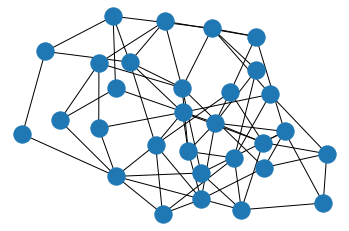

In [12]:
from matplotlib import pyplot as plt
import numpy as np
import networkx as nx
import random as rd
%matplotlib inline
from pylab import *


class SimulationSocial:
    def __init__(self, size=30, alpha=0.03, beta=0.3, gamma=4):
        self.size = size
        self.alpha = alpha #parameters
        self.beta = beta
        self.gamma = gamma

    def initialize(self):
        self.g = nx.watts_strogatz_graph(self.size, 5, 0.5) #use watts_strogatz graph for small world network
        for i in self.g.nodes:
            self.g.nodes[i]['opinion'] = rd.random() #randomizing the opinion to be between 0 and 1
        for i in self.g.edges:
            self.g.edges[i]['weight'] = 0.5 #as required by pcw: 0.5 weight at beginning


    def update(self):
        if rd.random() < 0.01: #create new connection
            list_of_nodes = list(self.g.nodes)
            is_connected = True #initiate variable to make sure the two chosen nodes are not connected yet
            while is_connected == True:
                edge_chosen = np.random.choice(list_of_nodes, 2)
                if edge_chosen in self.g.edges:
                    is_connected = True
                else:
                    is_connected = False
            self.g.add_edge(edge_chosen[0], edge_chosen[1], weight=0.5)
        
        else: #update the weights and opinions like specified
            edge_chosen = rd.choice(list(self.g.edges))
            o = [self.g.nodes[i]['opinion'] for i in edge_chosen]
            
            w = self.g.edges[edge_chosen]['weight'] #weight of edge

            for i in range(0,2): #0 and 1
                self.g.nodes[edge_chosen[i]]['opinion'] = (o[i] + self.alpha * w * (o[1-i] - o[i])) #formula given for opinion
            self.g.edges[edge_chosen]['weight'] = (w + self.beta * w * (1-w) * (1 - self.gamma * 
                                                                                abs(o[0] - o[1])))


        
    def observe(self):
        cla()
        nx.draw(self.g)

sim = SimulationSocial(alpha=0.03, beta=0.3, gamma=0.5)
sim.initialize()
for i in range(1000):
    sim.update()
sim.observe()